In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

`RM` - Average Number of rooms <br>
`LSTAT` - percentage of 'lower class' people (working poor) <br>
`PTRATIO` - ratio of students to teachers in primary and secondary schools <br>
`MEDV` - target variable, the median housing price
<br><br>
#### Common terms used in Machine learning
1. Features: Columns / independent variable
2. Target: What we are trying to predict / target column / dependent variable


In [3]:
# info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
# decriptive stats
df.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

In [5]:
# std = sqrt(sum(y - ÿ)**2/N) = sqrt(var)
# try to intuitively see if change in RM, LSTAT and PTRATIO will affect MEDV
df[['RM','LSTAT']].corr()

RM     LSTAT
RM     1.000000 -0.612033
LSTAT -0.612033  1.000000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

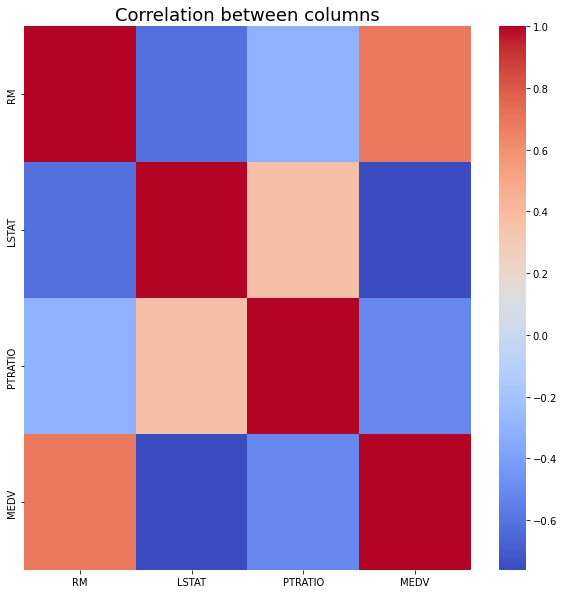

In [10]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation between columns", fontsize=18)
plt.show()

In [58]:
# build the ML algorithm => break the columns to target and feature vectors
y = df['MEDV'] # => normally single dimension, which is why is a 1D vector, hence small letter
X = df.drop('MEDV',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [59]:
len(X_train)/len(df)

0.7995910020449898

In [60]:
X_train.shape

(391, 3)

In [61]:
y_train.shape

(391,)

In [62]:
X_test.shape

(98, 3)

In [63]:
linreg = LinearRegression()

In [64]:
# step 1: fit dataset onto the algorithm
linreg.fit(X_train,y_train)

LinearRegression()

In [65]:
y_hat = linreg.predict(X_test)

In [66]:
#create our own test set:
dict_test = {"RM":[10, 2, 3], 'LSTAT':[12, 15, 4], 'PTRATIO':[4, 16, 20]}
X_test2 = pd.DataFrame(dict_test)

In [67]:
X_test2

RM  LSTAT  PTRATIO
0  10     12        4
1   2     15       16
2   3      4       20

In [68]:
linreg.predict(X_test2)

array([1076504.40138552,  114171.93693296,  241023.50983303])

### Naive Predictor => Our machine learning model SHOULD ALWAYS PERFORM BETTER THAN THIS!
It is based on human intuition.
- Regression: Expected Value => E(x) => Mean of dataset
- Classification: depends on your intuition

For this example, the naive predictor, is any model that gives out the expected value anytime you want to predict: $454k

In [69]:
# comparison between y_hat vs y
r2_score(y_test,y_hat)

0.691093400309851

In [46]:
mean_absolute_error(y_test,y_hat)

63313.49737234147

In [33]:
mean_squared_error(y_test,y_hat)

6789025559.265894

In [70]:
y_train_pred = linreg.predict(X_train)

In [71]:
r2_score(y_train,y_train_pred)

0.7194530968926247

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
decreg = DecisionTreeRegressor()

In [74]:
decreg.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
y_hat_dec = decreg.predict(X_test)

In [76]:
r2_score(y_test, y_hat_dec)

0.7197491939798666

In [77]:
#tweak some parameters here:
decreg2 = DecisionTreeRegressor(max_depth=5)
decreg3 = DecisionTreeRegressor(max_depth=4)

In [80]:
decreg2.fit(X_train,y_train)
y_hat_decreg2 = decreg2.predict(X_test)

In [81]:
r2_score(y_test, y_hat_decreg2)

0.8244241701493289

In [79]:
decreg3.fit(X_train,y_train)
y_hat_decreg3 = decreg3.predict(X_test)

In [82]:
r2_score(y_test, y_hat_decreg3)

0.8439995575360899

In [83]:
mean_absolute_error(y_test, y_hat_decreg3)

45178.58426027458

In [84]:
# Take the best model (decreg3) , and store it in file as a pickle format, .pkl
import pickle

filename = 'housing.pkl'
with open(filename, 'wb') as f:
    pickle.dump(decreg3,f)

In [87]:
mean_absolute_percentage_error(y_test, y_hat_decreg3)

0.13181973802045216

In [88]:
mean_absolute_percentage_error(y_test, y_hat)

0.1805023982690325

In [121]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [122]:
knn.fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

In [123]:
r2_score(y_test, y_hat_knn)

0.8173282035090312

In [124]:
mean_absolute_percentage_error(y_test, y_hat_knn)

0.1381648030484548

In [125]:
from sklearn.svm import SVR
svr = SVR()

In [126]:
svr.fit(X_train, y_train)
y_hat_svr = svr.predict(X_test)

In [127]:
r2_score(y_test, y_hat_svr)

-0.018430633102828775

## Decision Tree Problem

Tendency to overfit is very, very high! We will look into solving this later

In [130]:
y_train_pred = decreg3.predict(X_train)

In [131]:
r2_score(y_train,y_train_pred)

0.8596208050871595